#NEURAL NETWORKS: HANDWRITTEN CHARACTER RECOGNITION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1**: Import the necesary libraries
- Numpy: for working with data and doing operations with it easly
- Matplotlib: for plotting results
- Keras: to obtain the data set

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import keras
from keras.datasets import mnist


Step 2: Get data and Data Preprocessing:

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data();

Data Set Analysis

In [ ]:
print(f"Training Set={X_train.shape} and Testing Set={ X_test.shape}")#Group-2

Training Set=(60000, 28, 28) and Testing Set=(10000, 28, 28)


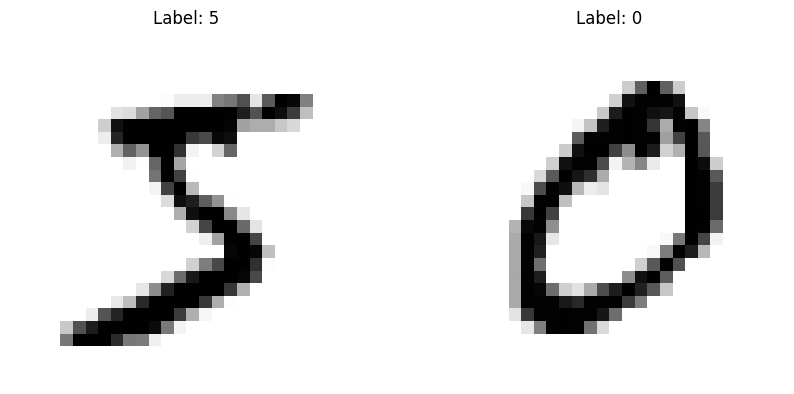

In [ ]:
def plot_train(num_images):#Group-2
  fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
  for i in range(num_images):
      axes[i].imshow(X_train[i], cmap='binary')
      axes[i].set_title("Label: "+ str(y_train[i]))
      axes[i].axis('off')
  plt.show()

plot_train(2)

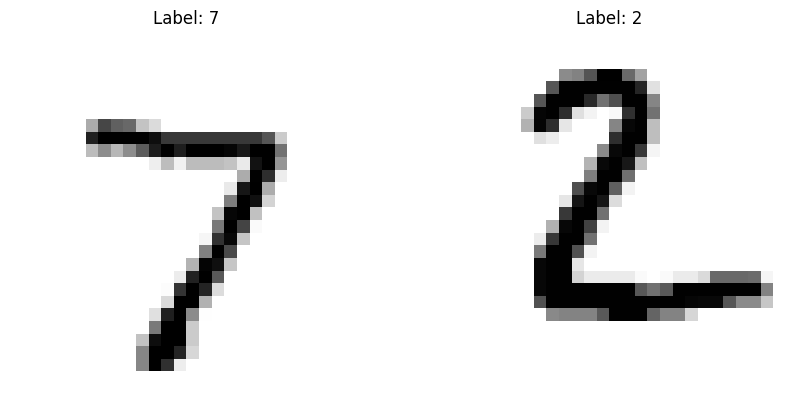

In [ ]:
def plot_test(num_images):#Group-2
  fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
  for i in range(num_images):
      axes[i].imshow(X_test[i], cmap='binary')
      axes[i].set_title("Label: "+ str(y_test[i]))
      axes[i].axis('off')
  plt.show()

plot_test(2)

We code some function for reprenting visually some of the digits:

##Preprocessing the data
We are going to use `astype()` function to normalize the pixel values in a dataset, and then divide it by 255 to obtain values between 0 and 1

In [ ]:
#Normalize the data:

X_train = X_train.astype(np.float32)/255;
X_test = X_test.astype(np.float32)/255;

Also, we need to reshape or dataset in order to XXXX

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


After the reshape, we see that we have now another dimension. We have done this because afterwards we are going to need that fourth entry. Let's explain the meaning of each one:
- 6000 is the batch_size, number of samples in each batch of data
- 28 is the image height
- 28 is the image weidth
- 1 is the channel, as the images are in the grayscale

We have also to modify the target labels (y-datasets). In machine learing algorithms, it is commonly used the **one-hot encoding** data, that means that each label instead of being a numerical or categorical data, is going to become a binary vector. We use this to avoid ordinal relationships.

In [ ]:
print("The original target label is " + str(y_train[4]))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print("The one-hot encoded target label is " + str(y_train[4]))

The original target label is 9
The one-hot encoded target label is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


##Star with the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


Lets start with a model without using any hyperparamter optimazation, just to see the output and how this sequential works. We start the model using sequential and then we start adding layers:

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
#avoid overfitting
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

If we want to see the summary of the model:

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

We **compile** the model:

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

##Model Training

In [ ]:
his = model.fit(X_train, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 9s 6ms/step - loss: 0.2568 - accuracy: 0.9199 - val_loss: 0.0979 - val_accuracy: 0.9705
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0971 - accuracy: 0.9699 - val_loss: 0.0617 - val_accuracy: 0.9813
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0744 - accuracy: 0.9760 - val_loss: 0.0566 - val_accuracy: 0.9831
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.0467 - val_accuracy: 0.9859
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0445 - val_accuracy: 0.9861


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9881
Test accuracy: 0.988099992275238


# Save Model

In [ ]:
model.save('model.h5')
print('Saved Successfully')

Saved Successfully


#Capture and Predict using camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to match the input size of the model
    resized_image = cv2.resize(image, (28, 28))  # Assuming input size of 28x28
    # Convert to grayscale if necessary
    if len(resized_image.shape) > 2 and resized_image.shape[2] == 3:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values to range [0, 1]
    normalized_image = resized_image.astype('float32') / 255.0
    cv2_imshow(normalized_image)
    # Reshape the image to match the input shape of the model
    input_image = np.expand_dims(normalized_image, axis=0)
    input_image = np.expand_dims(input_image, axis=3)  # Add channel dimension
    return input_image

<IPython.core.display.Javascript object>

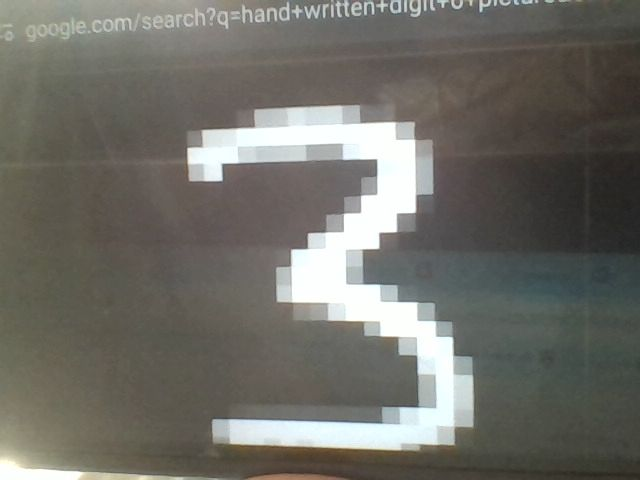

1/1 [==============================] - 0s 17ms/step
Predicted class: 3


In [ ]:
from IPython.display import Image
filename='photo.jpg'
try:
  filename = take_photo(filename=filename)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
# Load and preprocess the new image
new_image = cv2.imread(filename)
preprocessed_image = preprocess_image(new_image)
# Make predictions using the model
predictions = model.predict(preprocessed_image)
# Interpret the predictions
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)